In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[[137 135 133 ... 145 147 114]
 [137 137 133 ... 144 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  29  28 ...  53  61  59]
 [ 20  24  25 ...  64  70  65]
 [ 22  30  25 ...  71  67  72]]


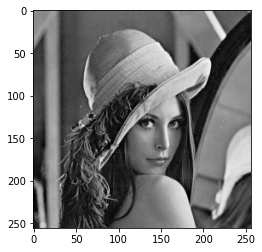

In [2]:
img=cv.imread('lena256.jpg',cv.IMREAD_ANYCOLOR)
[width,hight]=img.shape
print(img)
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
mem = img.reshape(-1,1)
print(mem)

[[137]
 [135]
 [133]
 ...
 [ 71]
 [ 67]
 [ 72]]


In [6]:
AC = 0 # 16 bit
Z  = 1 # 1 bit
R  = 0 # 16 bit - store calculated data for filtering
R0 = 0 # 16 bit - read address for filtering
R1 = 0 # 16 bit - limit of loops for filtering        - read address for sampling
R2 = 0 # 16 bit - write address for sampling
R3 = 0 # 16 bit - no of rows in down sampled image
R4 = 0 # 16 bit - filtering address                   - no of columns in down sampled image

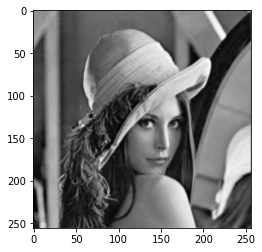

[[137 135 133 ... 145 147 114]
 [137 135 133 ... 139 138 118]
 [132 133 133 ... 120 110  94]
 ...
 [ 30  28  27 ...  52  58  52]
 [ 27  25  25 ...  62  66  65]
 [ 22  30  25 ...  71  67  72]]


In [7]:
#filtering
AC,Z = 0,1
R1 = 65022 # (256*(256-2))-2
AC,Z = 0,1
R4 = 257 # first pixel to be filtered
while True:
    #taking values from middle row of the kernal
    R = 0
    R0 = R4
    AC = mem[R0][0]
    R = AC*16
    R0 += 1
    AC = mem[R0][0]
    R += (AC*3)
    R0 -= 2
    AC = mem[R0][0]
    R += (AC*3)
    #taking values from lower row of the kernal
    R0 = R4 + 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    #taking values from upper row of the kernal
    R0 = R4 - 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    R = R/32
    mem[R4][0] = R
    R4 += 1
    R1 -= 1
    if R1 == 0:
        Z = 0
    if Z == 0:
        break
filtered_image = mem.reshape(256,256)
plt.imshow(filtered_image,cmap='gray')
plt.show()
print(filtered_image)

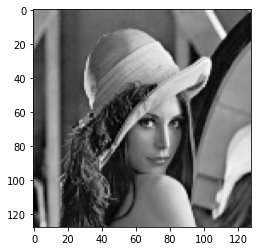

[[137 133 138 ...  85 123 147]
 [132 133 134 ...  90 111 110]
 [117 130 132 ...  89  49  28]
 ...
 [ 26  31  38 ...  31  27  27]
 [ 28  29  33 ...  31  33  47]
 [ 27  25  30 ...  33  51  66]]


In [8]:
#downsampling
R3 = 128
R1 = 0
R2 = 0
while True:
    R4 = 128
    while True:
        AC,Z = 0,1
        AC = mem[R1][0]
        mem[R2][0] = AC
        R2 += 1
        R1 += 2
        R4 -= 1
        if R4 == 0:
            Z = 0
        if Z == 0:
            break
    AC,Z = 0,1
    R1 += 256
    R4 = 128
    R3 -= 1
    if R3 == 0:
        Z = 0
    if Z == 0:
        break
dwn_smpld_image = mem[0:16384].reshape(128,128)   #16384 = 128*128
plt.imshow(dwn_smpld_image,cmap='gray')
plt.show()
print(dwn_smpld_image)